### In this notebook we use tensorflow CNN model to find waldo.

In [83]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

from img_gen import create_sample
import cv2

In [84]:
#constants
IMG_SIZE = 256

In [85]:
# creating waldo images

# create_sample(IMG_SIZE,5000)

In [ ]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    '../data/selfmade',
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

print(test_ds.class_names)

Found 10337 files belonging to 2 classes.
Using 8270 files for training.
Using 2067 files for validation.
['notwaldo', 'waldo']


In [ ]:
yesset = tf.keras.utils.image_dataset_from_directory(
    '../data/selfmade/',
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

print(yesset.class_names)

Found 10337 files belonging to 2 classes.
['notwaldo', 'waldo']


In [ ]:
notset = tf.keras.utils.image_dataset_from_directory(
    '../data/src1/notwaldo',
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

print(notset.class_names)

Found 5337 files belonging to 1 classes.
['notwaldo']


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda, Resizing
from tensorflow.keras.models import Sequential

def get_conv(input_shape=(IMG_SIZE, IMG_SIZE, 3), filename=None):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
from tensorflow.keras.applications import ResNet50

model = get_conv()

model2 = Sequential()
model2.add(Resizing(224,224))
model2.add(ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3)))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(2, activation='softmax'))


In [ ]:
from collections import Counter

label_counter = Counter()

# Iterate through the dataset
for images, labels in test_ds:
    # Convert the labels to numpy array if they are in tensor format
    labels_np = labels.numpy()
    
    # Update the counter with the labels in the current batch
    label_counter.update(labels_np)

# Print the number of elements for each class
for label, count in label_counter.items():
    print(f"Class {label}: {count} elements")

Class 0: 1085 elements
Class 1: 982 elements


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# both = yesset.concatenate(train_ds)
model2.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=5)
history2 = model2.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/5


2024-06-09 11:31:53.339708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8270]
	 [[{{node Placeholder/_4}}]]
2024-06-09 11:31:53.339924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8270]
	 [[{{node Placeholder/_4}}]]
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 70/259 [=======>......................] - ETA: 1:25 - loss: 238.8833 - accuracy: 0.8955

KeyboardInterrupt: 

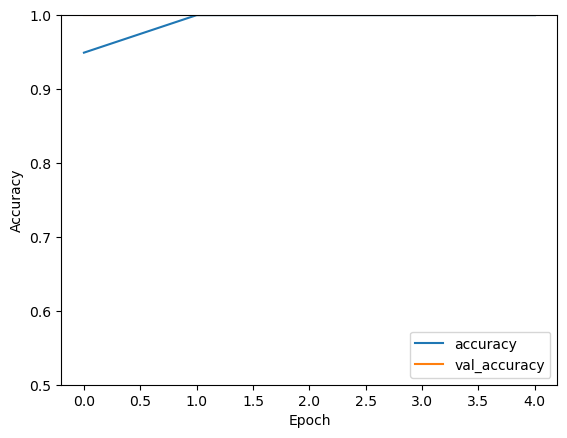

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:

test_loss, test_acc = model.evaluate(yesset, verbose=2)

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

predictions = model.predict(test_ds)

print(predictions[1])

2024-06-09 11:32:35.381170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10337]
	 [[{{node Placeholder/_4}}]]
2024-06-09 11:32:35.381410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10337]
	 [[{{node Placeholder/_0}}]]


324/324 - 39s - loss: 0.0817 - accuracy: 0.9766 - 39s/epoch - 121ms/step
65/65 - 8s - loss: 0.0793 - accuracy: 0.9758 - 8s/epoch - 119ms/step
65/65 [==============================] - 8s 118ms/step
[8.0424879e-04 9.9919575e-01]


In [ ]:
import os
directory_path = f'../data/src1/{IMG_SIZE}'
pref = "5_"
filenames = [(f,'waldo') for f in os.listdir(directory_path+'/waldo') if f.startswith(pref)]+[(f, 'notwaldo') for f in os.listdir(directory_path+'/notwaldo') if f.startswith(pref)]
filenames.sort()
filenames

[('5_0_0.jpg', 'notwaldo'),
 ('5_0_1.jpg', 'waldo'),
 ('5_0_2.jpg', 'notwaldo'),
 ('5_0_3.jpg', 'notwaldo'),
 ('5_1_0.jpg', 'waldo'),
 ('5_1_2.jpg', 'notwaldo'),
 ('5_1_3.jpg', 'notwaldo'),
 ('5_2_0.jpg', 'notwaldo'),
 ('5_2_1.jpg', 'notwaldo'),
 ('5_2_2.jpg', 'notwaldo'),
 ('5_2_3.jpg', 'notwaldo'),
 ('5_3_0.jpg', 'notwaldo'),
 ('5_3_1.jpg', 'notwaldo'),
 ('5_3_2.jpg', 'notwaldo'),
 ('5_3_3.jpg', 'notwaldo')]

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tqdm import tqdm

correct=0
incorrect=0
incorrect_files=[]
correct_files=[]
# print(filenames)
for fname, true in tqdm(filenames):
    img = image.load_img(f'../data/src1/{IMG_SIZE}/{true}/{fname}', target_size=(IMG_SIZE, IMG_SIZE, 3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0  # Normalize the image to match the training data
    
    # Predict the class
    prediction = model.predict(img_array, verbose =0)
    predicted_class = 'waldo' if prediction[0][0] < prediction[0][1] else 'notwaldo'
    # if true == 'notwaldo':
        # print(true, prediction)
    
    # Print the prediction
    if predicted_class==true:
        correct += 1
        correct_files+=[f'../data/src1/{IMG_SIZE}/{true}/{fname}']
    else:
        incorrect_files+=[f'../data/src1/{IMG_SIZE}/{true}/{fname}']
        incorrect += 1
    # print(f'Predicted class: {predicted_class} with {prediction[0]}\t{"CORRECT" if predicted_class == True else "INCORRECT"}')
    
    # Optionally, display the image
    # plt.imshow(img)
    # plt.title(f'Predicted: {predicted_class}')
    # plt.show()
print(correct, incorrect)


100%|██████████| 15/15 [00:00<00:00, 18.91it/s]

8 7


In [ ]:
counter =0
for f in correct_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/waldo'):
        counter+=1
counter2 =0
for f in incorrect_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/waldo'):
        counter2+=1 

print("Waldo correct: ",counter, " incorrect: ", counter2)

counter =0
for f in correct_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/notwaldo'):
        counter+=1
counter2 =0
for f in incorrect_files:
    if f.startswith(f'../data/src1/{IMG_SIZE}/notwaldo'):
        counter2+=1 

print("Notwaldo correct: ",counter, " incorrect: ", counter2) 

Waldo correct:  0  incorrect:  2
Notwaldo correct:  8  incorrect:  5
